In [178]:
# Computational Packages
import numpy as np
import pandas as pd

# Visualisation Packages
import matplotlib.pyplot as plt

# NLTK packages
from nltk.corpus import stopwords

#Other packages
from PIL import Image
from wordcloud import WordCloud
import re

### Auxillary Functions

In [179]:
def wordcloud_plotter(text, stopwords, mask, bcolor, cap, plt_title=None, figsize=None):
    """ Function to plot wordcloud onto a given mask"""
    wordcloud = WordCloud(background_color=bcolor, mask=mask, stopwords=stopwords, max_words=cap)
    wordcloud.generate(text)
    
    # Displaying the plot
    plt.clf()
    if figsize is not None:
        plt.figure(figsize=figsize)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if plt_title is not None:
        plt.title(plt_title)
    plt.show()

## Visualising Alice in Wonderland text
    -> Source : https://gist.github.com/phillipj/4944029

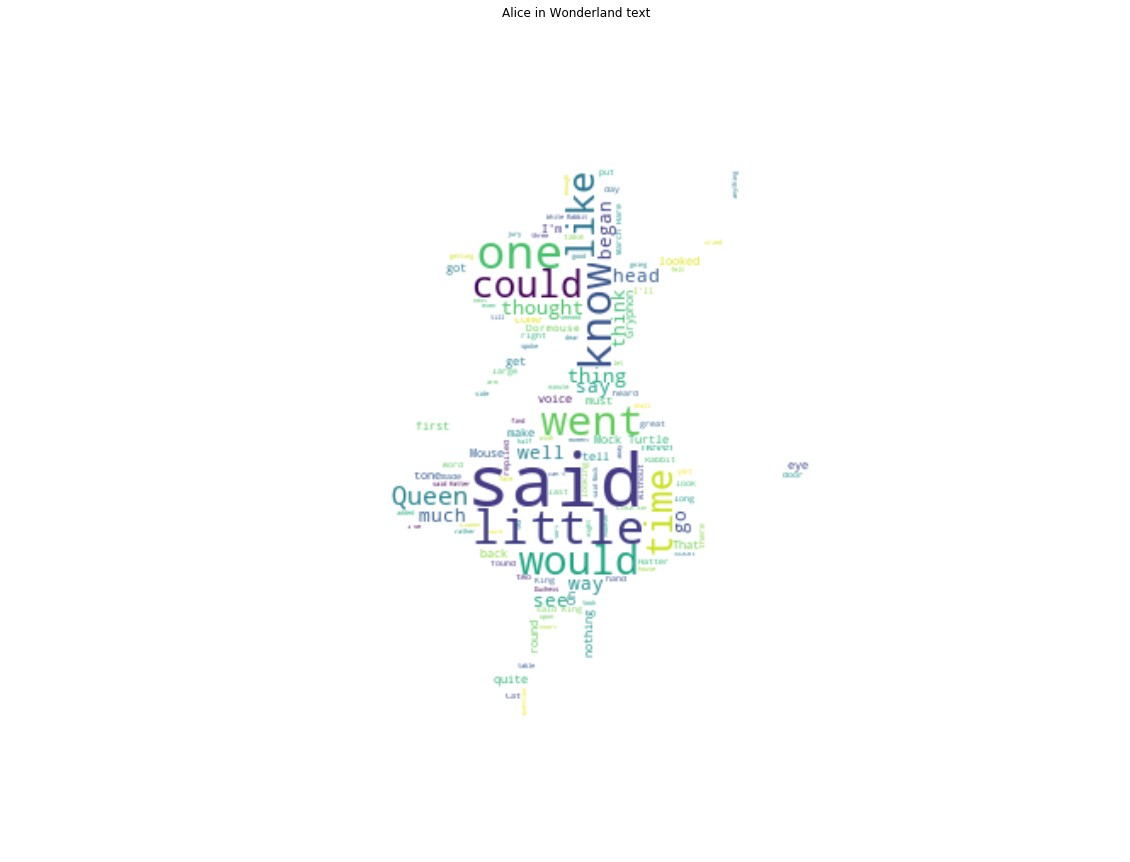

In [180]:
with open('data/alice_wonderland.txt', 'r') as inp_file:
    alice_text = inp_file.read().replace('\n', '')

image_mask = np.array(Image.open('data/sample_masked.png'))
stopword_list = stopwords.words('english')

appended_stopwords = ['Alice']
stopword_list += appended_stopwords

# Plot
wordcloud_plotter(alice_text, stopword_list, image_mask, 'white', 1500, 'Alice in Wonderland text', figsize=(20,15))

## Visualising Twitter Sentiment text
    -> Source : https://www.kaggle.com/c/twitter-sentiment-analysis2/data

In [181]:
twitter_sentiment = pd.read_csv('data/twitter_sentiment.csv')[['SentimentText']]
twitter_sentiment_text = twitter_sentiment.to_string()

twitter_image_mask = np.array(Image.open('data/twitter_logo.png'))
stopword_list = stopwords.words('english')

#twitter_sentiment.head(10)

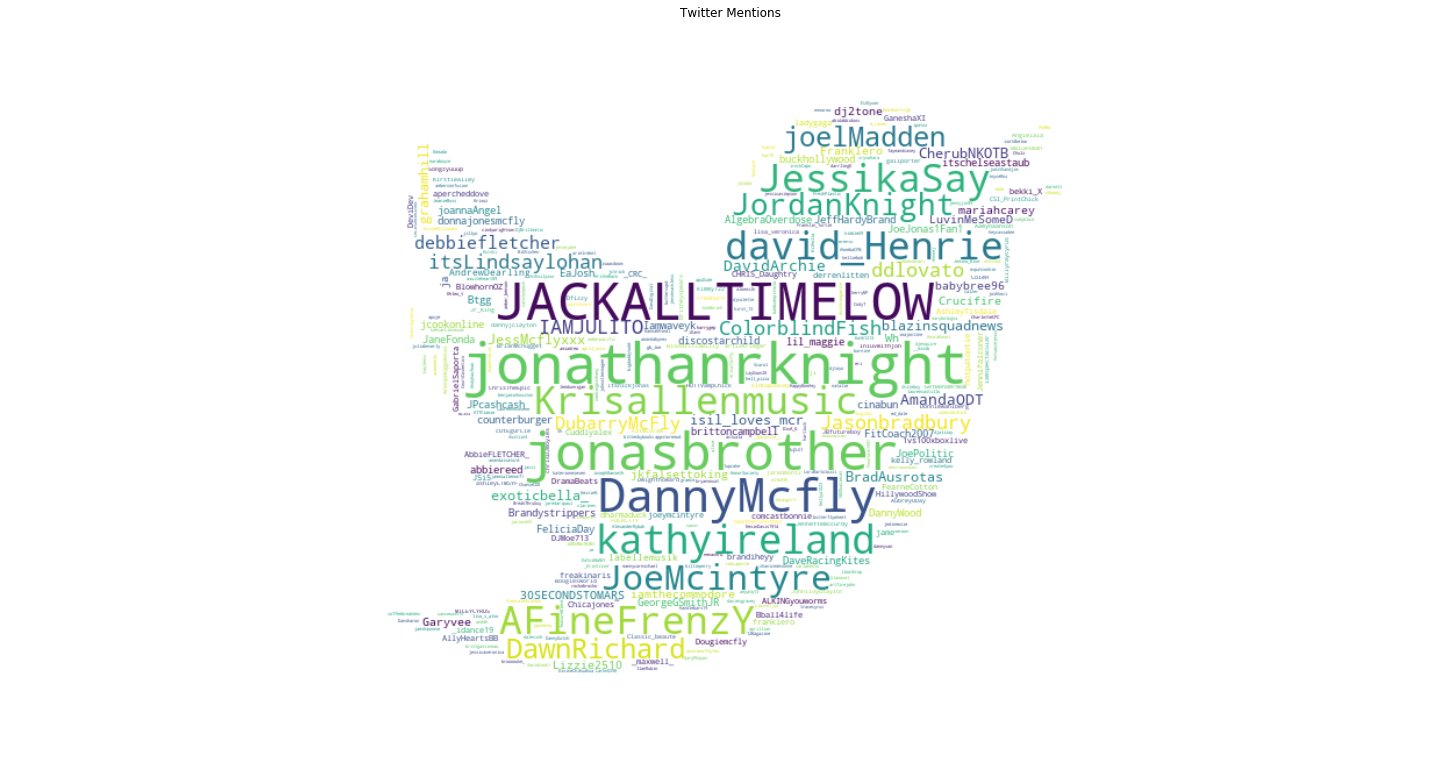

In [182]:
# Visulising only mentions
mentions = list(set(re.findall(r"@(\w+)", twitter_sentiment_text)))
mentions_text = ' '.join(mentions).encode('utf-8')

appended_stopwords = []
stopword_list += appended_stopwords

# Plot
wordcloud_plotter(mentions_text, stopword_list, twitter_image_mask, 'white', 1500, 'Twitter Mentions', figsize=(25, 20))

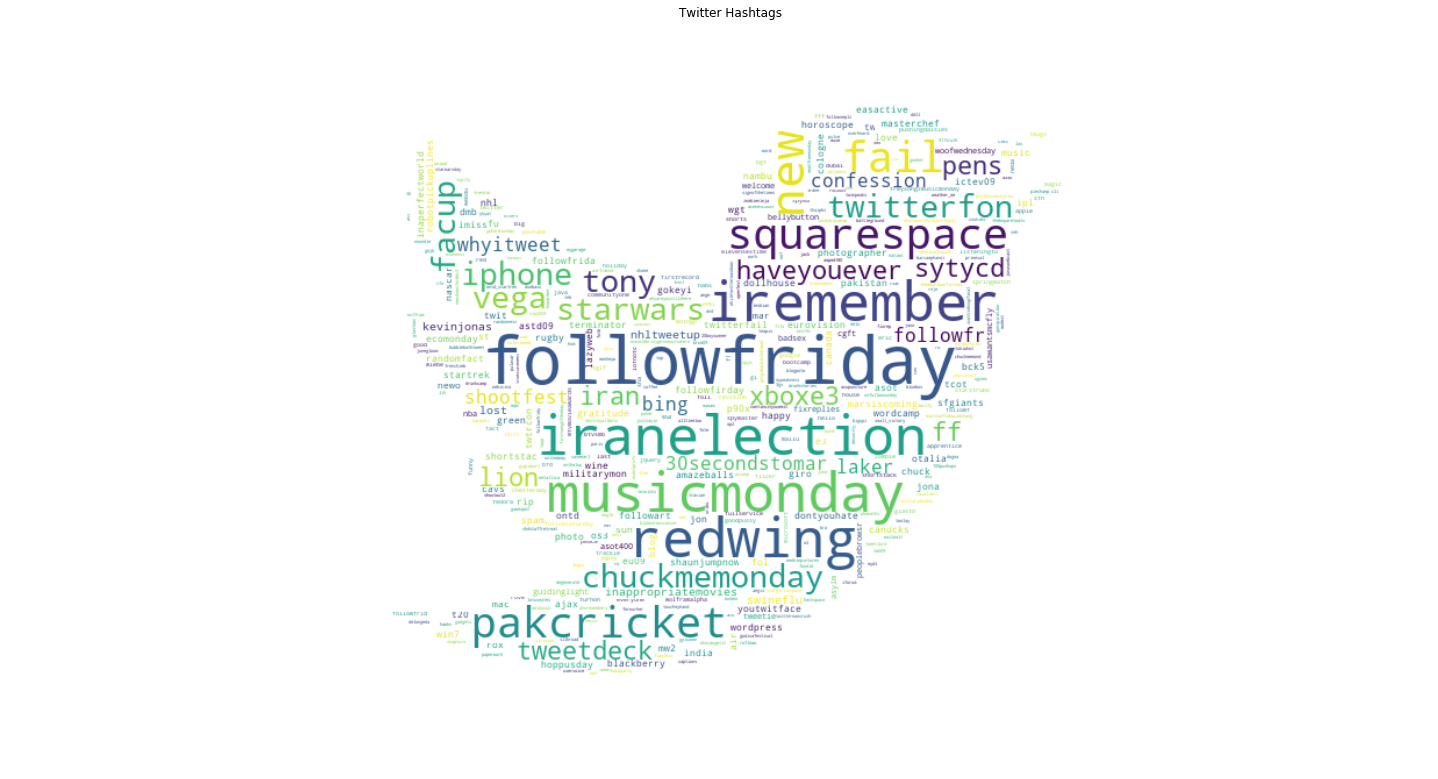

In [183]:
# Visulising only hashtags
mentions = list(set(re.findall(r"#(\w+)", twitter_sentiment_text)))
mentions_text = ' '.join(mentions).encode('utf-8').lower()

appended_stopwords = ['follow', 'goodsex']
stopword_list += appended_stopwords

# Plot
wordcloud_plotter(mentions_text, stopword_list, twitter_image_mask, 'white', 1500, 'Twitter Hashtags', figsize=(25,15))

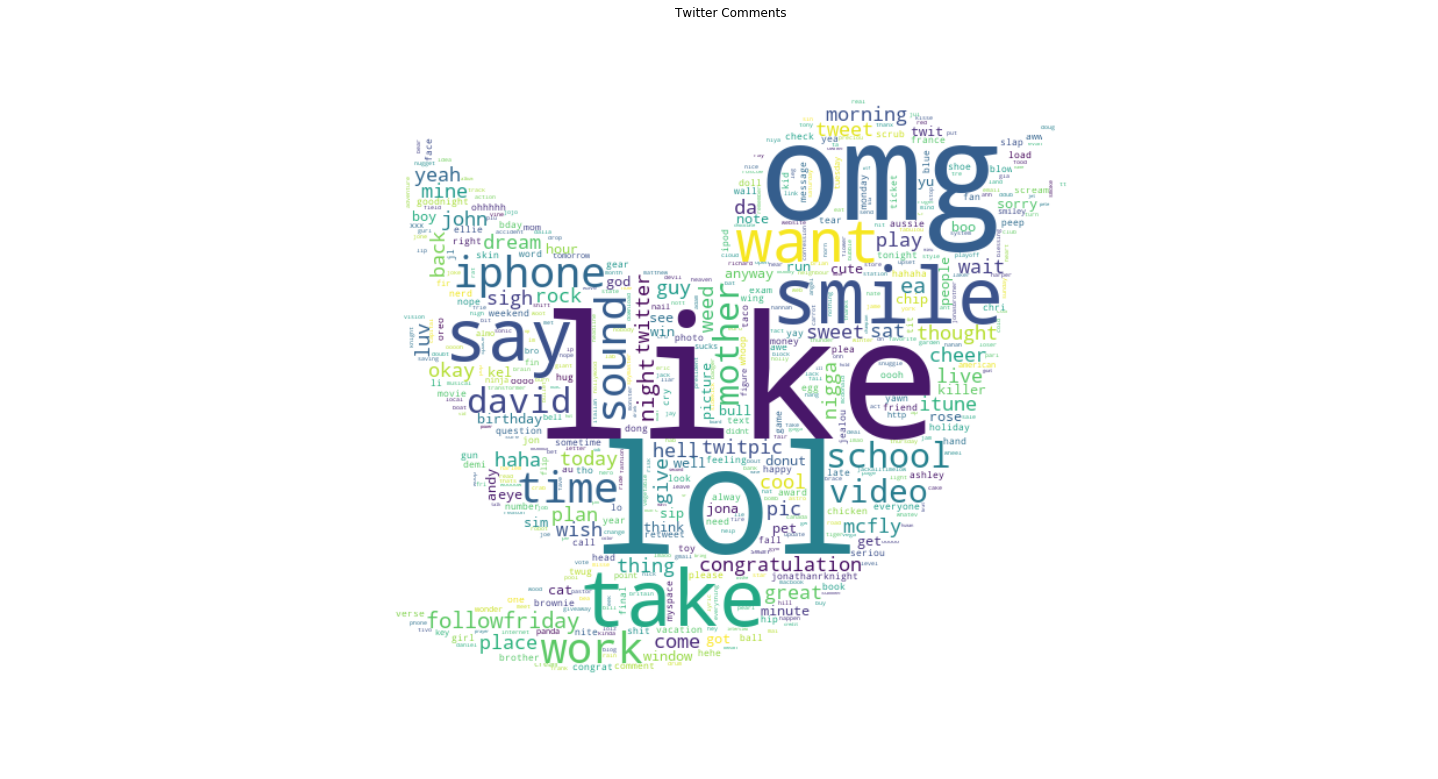

In [184]:
# Visulising only texts
mentions = list(set(re.findall(r"[a-zA-Z_]+", twitter_sentiment_text)))
mentions_text = ' '.join(mentions).encode('utf-8').lower()

appended_stopwords = ['thank', 'love', 'suck', 'good', 'follow']
stopword_list += appended_stopwords

# Plot
wordcloud_plotter(mentions_text, stopword_list, twitter_image_mask, 'white', 1500, 'Twitter Comments', figsize=(25,15))